<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Guassian_Motion_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc
from sklearn.datasets import load_sample_image


In [99]:
window_size = 5
vector = (1,0)

In [100]:
x = np.linspace(-5,5,50*window_size)
x_sample = np.linspace(-5,5,window_size)

In [101]:
X,Y = np.meshgrid(x,x)
X_s, Y_s = np.meshgrid(x_sample,x_sample)

In [152]:
def guassian2D(X,Y, sigma):
  return 1/(2*np.pi*sigma**2) * np.exp(-(X**2 + Y**2)/2/sigma**2)

def guassian(X,Y, sigma, vector):
  return 1/(2*np.pi*sigma**2)**0.5 * np.exp((-(vector[0]*X + vector[1]*Y)**2)/2/sigma**2)

In [153]:
out = guassian(X,Y,10, vector)

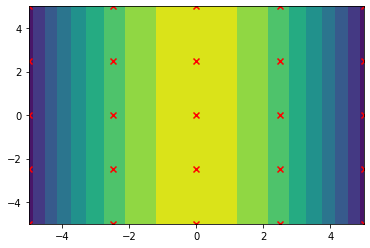

In [154]:
plt.contourf(X,Y,out)
plt.scatter(X_s, Y_s, marker='x', c='r')

In [155]:
x_samp = np.linspace(0,50*window_size-1,window_size,dtype=int)
x_samp

array([   0,   51,  103,  155,  206,  258,  310,  361,  413,  465,  516,
        568,  620,  671,  723,  775,  827,  878,  930,  982, 1033, 1085,
       1137, 1188, 1240, 1292, 1343, 1395, 1447, 1499])

In [156]:
X_samp, Y_samp = np.meshgrid(x_samp, x_samp)


In [157]:
weights = out[x_samp][:,x_samp]
weights = weights / np.sum(weights)

IndexError: ignored

In [ ]:
plt.contourf(X_samp, Y_samp, weights)
plt.scatter(X_samp,Y_samp, marker='x', c='r')


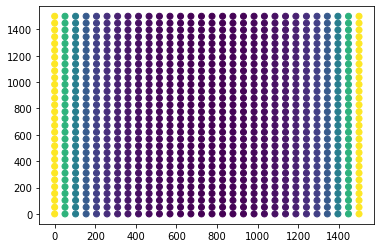

In [158]:
plt.scatter(X_samp, Y_samp, c=weights)

In [159]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [160]:
flower = load_sample_image("flower.jpg") / 255
flower =  rgb2gray(flower)
flower.shape

(427, 640)

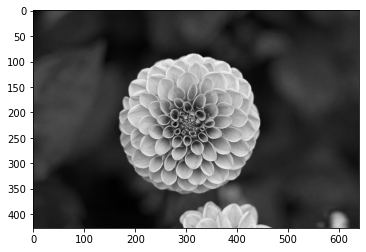

In [161]:
plt.imshow(flower, cmap='gray')

In [162]:
def get_weights(window_size, sigma, vector):
  x  = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  result = guassian(X,Y,sigma, vector)
  x_samp = np.linspace(0,100*window_size-1,window_size,dtype=int)
  X_samp, Y_samp = np.meshgrid(x_samp, x_samp)
  weights = result[x_samp][:,x_samp]
  #weights = weights / np.sum(weights)
  return X_samp, Y_samp,weights

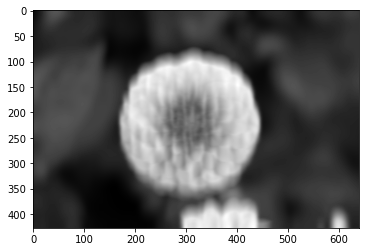

In [163]:
window_size = 30
sigma = 2
vector = (1,0)
X_samp, Y_samp, weights = get_weights(window_size,sigma, vector)
grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')

## Final Test
motoin -> in the direction of [1,1] vector

iteration on different values for sigma. **I think a good value for sigma would be 0.1**

Note that the window size is 30. I have chosen this number to make the effect of the filter more visible.

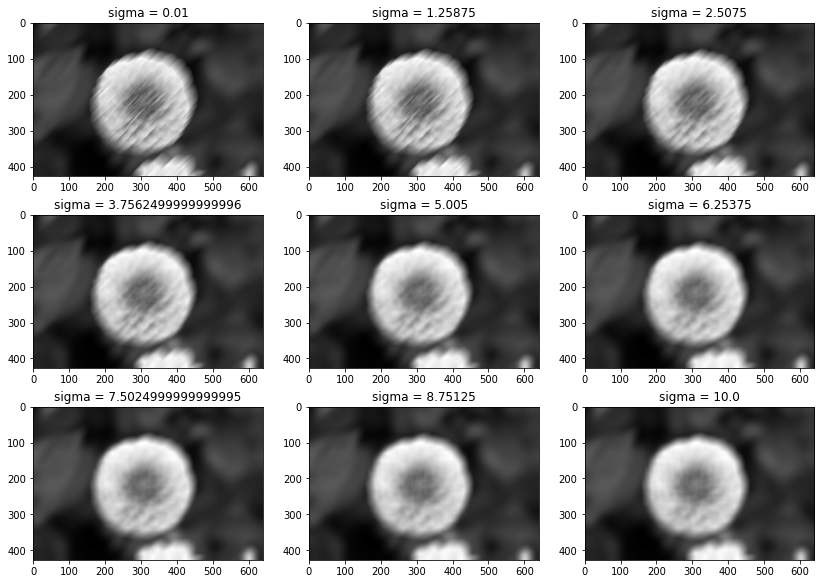

In [170]:
Sigma = np.linspace(0.01,10,9).reshape((3,3))
vector = [1,1]
fig, ax = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
  for j in range(3):
    X_samp, Y_samp, weights = get_weights(30, Sigma[i,j], vector)
    grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')
    ax[i,j].imshow(grad, cmap='gray')
    ax[i,j].set_title("sigma = {}".format(Sigma[i,j]) )

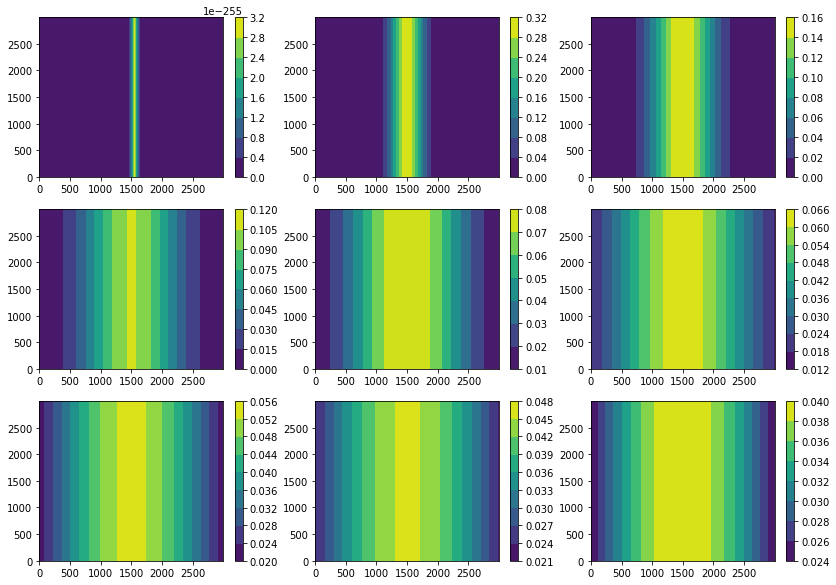

In [172]:
Sigma = np.linspace(0.01,10,9).reshape((3,3))
vector = [1,0]
fig, ax = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
  for j in range(3):
    X_samp, Y_samp, weights = get_weights(30, Sigma[i,j], vector)
    im = ax[i,j].contourf(X_samp, Y_samp, weights)
    plt.colorbar(im, ax = ax[i,j])
